In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits, ascii
from astropy.table import Table
from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density

import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import ICRS

from scipy.stats import norm
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
# enter path of table to be used:
# for now enter the table I downloaded from Gaia, as 4MOST input catalogue does not contain all parameters yet
path='data/catalogues/GALAH_DR3_main_allstar_v2.fits'

hdu_list = fits.open(path, memmap=True)
table = Table(hdu_list[1].data)

# define colormap for all the density plots
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

print('Number of objects full GALAH DR3:',len(table))

Number of objects full GALAH DR3: 588571


In [3]:
# load abundances
ra=table['ra_dr2']
dec=table['dec_dr2']
vmag=table['v_jk']
j_ks=table['j_m']-table['ks_m']
teff = table['teff']
e_teff = table['e_teff']
logg = table['logg']
e_logg = table['e_logg']
feh_galah = table['fe_h']
e_feh_galah = table['e_fe_h']
alpha_fe = table['alpha_fe']
e_alpha_fe = table['e_alpha_fe']
srfe_galah = table['Sr_fe']
e_srfe_galah = table['e_Sr_fe']
yfe_galah = table['Y_fe']
e_yfe_galah = table['e_Y_fe']
zrfe_galah = table['Zr_fe']
e_zrfe_galah = table['e_Zr_fe']
bafe_galah = table['Ba_fe']
e_bafe_galah = table['e_Ba_fe']
lafe_galah = table['La_fe']
e_lafe_galah = table['e_La_fe']
cefe_galah = table['Ce_fe']
e_cefe_galah = table['e_Ce_fe']
ndfe_galah = table['Nd_fe']
e_ndfe_galah = table['e_Nd_fe']
smfe_galah = table['Sm_fe']
e_smfe_galah = table['e_Sm_fe']
eufe_galah = table['Eu_fe']
e_eufe_galah = table['e_Eu_fe']
flag_sp = table['flag_sp']
flag_fe_h = table['flag_fe_h']
flag_alpha_fe = table['flag_alpha_fe']
flag_sr_fe = table['flag_Sr_fe']
flag_y_fe = table['flag_Y_fe']
flag_zr_fe = table['flag_Zr_fe']
flag_ba_fe = table['flag_Ba_fe']
flag_la_fe = table['flag_La_fe']
flag_ce_fe = table['flag_Ce_fe']
flag_nd_fe = table['flag_Nd_fe']
flag_sm_fe = table['flag_Sm_fe']
flag_eu_fe = table['flag_Eu_fe']

#flag cleaning
feh_galah[flag_fe_h!=0] = np.nan
alpha_fe[flag_alpha_fe!=0] = np.nan
srfe_galah[flag_sr_fe!=0] = np.nan
yfe_galah[flag_y_fe!=0] = np.nan
zrfe_galah[flag_zr_fe!=0] = np.nan
bafe_galah[flag_ba_fe!=0] = np.nan
lafe_galah[flag_la_fe!=0] = np.nan
cefe_galah[flag_ce_fe!=0] = np.nan
ndfe_galah[flag_nd_fe!=0] = np.nan
smfe_galah[flag_sm_fe!=0] = np.nan
eufe_galah[flag_eu_fe!=0] = np.nan
e_feh_galah[flag_fe_h!=0] = np.nan
e_alpha_fe[flag_alpha_fe!=0] = np.nan
e_srfe_galah[flag_sr_fe!=0] = np.nan
e_yfe_galah[flag_y_fe!=0] = np.nan
e_zrfe_galah[flag_zr_fe!=0] = np.nan
e_bafe_galah[flag_ba_fe!=0] = np.nan
e_lafe_galah[flag_la_fe!=0] = np.nan
e_cefe_galah[flag_ce_fe!=0] = np.nan
e_ndfe_galah[flag_nd_fe!=0] = np.nan
e_smfe_galah[flag_sm_fe!=0] = np.nan
e_eufe_galah[flag_eu_fe!=0] = np.nan

In [4]:
# Sun as reference
# Lodders et al (2009) / Prantzos et al (2020) abundance values for sun
atomic_Z_sun = np.array([38,39,40,41,42,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,62,63])
dict_sun = {'Sr':0, 'Y':1, 'Zr':2, 'Nb':3, 'Mo':4, 'Ru':5, 'Rh':6, 'Pd':7, 'Ag':8, 'Cd':9, 'In':10, 'Sn':11, 'Sb':12, 'Te':13, 'I':14, 'Xe':15, 'Cs':16, 'Ba':17, 'La':18, 'Ce':19, 'Pr':20, 'Nd':21, 'Sm':22, 'Eu':23}
logeps_sun = np.array([2.953,2.252,2.619,1.479,1.993,1.837,1.155,1.719,1.277,1.784,0.837,2.144,1.082,2.258,1.628,2.324,1.156,2.237,1.247,1.658,0.822,1.519,1.013,0.580]) # logeps(X) = log(X/H)+12
r_frac_sun = np.array([0.083,0.222,0.183,0.349,0.275,0.591,0.878,0.542,0.791,0.432,0.582,0.301,0.753,0.807,0.968,0.816,0.843,0.109,0.200,0.148,0.465,0.385,0.647,0.951]) # fraction of element produced through r-process
s_frac_sun = np.array([0.912,0.778,0.817,0.651,0.497,0.338,0.122,0.448,0.209,0.548,0.374,0.680,0.247,0.192,0.032,0.182,0.157,0.888,0.799,0.848,0.535,0.615,0.325,0.049]) # fraction of element produced through s-process
logeps_sun_r = np.log10(r_frac_sun) + logeps_sun # solar system r-process component
logeps_sun_s = np.log10(s_frac_sun) + logeps_sun # solar system s-process component

# HD 122563 (Honda et al. 2006) as reference
# abundances of HD 122563 according to Honda et al. (2006)
atomic_Z_hd = np.array([38,39,40,41,42,44,46,47,56,57,58,59,60,62,63])
dict_hd = {'Sr':0, 'Y':1, 'Zr':2, 'Nb':3, 'Mo':4, 'Ru':5, 'Pd':6, 'Ag':7, 'Ba':8, 'La':9, 'Ce':10, 'Pr':11, 'Nd':12, 'Sm':13, 'Eu':14}
logeps_hd = np.array([-0.11,-0.93,-0.28,-1.48,-0.87,-0.86,-1.36,-1.88,-1.62,-2.66,-1.83,-2.15,-2.01,-2.16,-2.77])
e_logeps_hd = np.array([0.08,0.09,0.16,0.17,0.17,0.17,0.17,0.17,0.12,0.10,0.18,0.17,0.10,0.17,0.17])

# GALAH DR3 abundances
atomic_Z_galah = np.array([38,39,40,56,57,58,60,62,63])
dict_galah = {'Sr':0, 'Y':1, 'Zr':2, 'Ba':3, 'La':4, 'Ce':5, 'Nd':6, 'Sm':7, 'Eu':8}
xfe_galah = np.array([srfe_galah,yfe_galah,zrfe_galah,bafe_galah,lafe_galah,cefe_galah,ndfe_galah,smfe_galah,eufe_galah])
logeps_sun_galah = np.array([[logeps_sun[dict_sun['Sr']]],[logeps_sun[dict_sun['Y']]],[logeps_sun[dict_sun['Zr']]],[logeps_sun[dict_sun['Ba']]],[logeps_sun[dict_sun['La']]],[logeps_sun[dict_sun['Ce']]],[logeps_sun[dict_sun['Nd']]],[logeps_sun[dict_sun['Sm']]],[logeps_sun[dict_sun['Eu']]]])
logeps_galah = xfe_galah + feh_galah + logeps_sun_galah # logeps of stars according to GALAH DR3: log eps(X) = [X/H] + log eps(X)_sun = [X/Fe] + [Fe/H] + log eps(X)_sun
e_logeps_galah = np.sqrt(np.array([e_srfe_galah,e_yfe_galah,e_zrfe_galah,e_bafe_galah,e_lafe_galah,e_cefe_galah,e_ndfe_galah,e_smfe_galah,e_eufe_galah])**2+e_feh_galah**2) # error thereof, atm only two error sources taken into consideration

# GALAH only has some elements that the references have
galah_sun_elem=np.array([],dtype='bool')
for i in range(len(atomic_Z_sun)):
    if atomic_Z_sun[i] in atomic_Z_galah:
        galah_sun_elem=np.append(galah_sun_elem,True)
    else:
        galah_sun_elem=np.append(galah_sun_elem,False)

galah_hd_elem=np.array([],dtype='bool')
for i in range(len(atomic_Z_hd)):
    if atomic_Z_hd[i] in atomic_Z_galah:
        galah_hd_elem=np.append(galah_hd_elem,True)
    else:
        galah_hd_elem=np.append(galah_hd_elem,False)

# scaled abundances Sun (for r process, normalise at Eu; for s process, normalise at Ba) and HD122563 weak r-process (normalise at Zr)
eu_norm = logeps_sun_r[dict_sun['Eu']] - logeps_galah[dict_galah['Eu']] # value to normalise for each individual star
ba_norm = logeps_sun_s[dict_sun['Ba']] - logeps_galah[dict_galah['Ba']] # value to normalise for each individual star
#sr_norm = logeps_hd[dict_hd['Sr']] - logeps_galah[dict_galah['Sr']] # value to normalise for each individual star
zr_norm = logeps_hd[dict_hd['Zr']] - logeps_galah[dict_galah['Zr']] # value to normalise for each individual star

logeps_sun_r_sc = logeps_sun_r.reshape((len(logeps_sun_r),1)) - eu_norm # normalise by Eu
logeps_sun_s_sc = logeps_sun_s.reshape((len(logeps_sun_s),1)) - ba_norm # normalise by Ba
logeps_hd_sc = logeps_hd.reshape((len(logeps_hd),1)) - zr_norm #- sr_norm # normalise by Sr

# calculate residuals for each element between scaled reference pattern and GALAH pattern
delta_logeps_sunrsc_galah = logeps_galah - logeps_sun_r_sc[galah_sun_elem]
delta_logeps_sunssc_galah = logeps_galah - logeps_sun_s_sc[galah_sun_elem]
delta_logeps_hdsc_galah = logeps_galah - logeps_hd_sc[galah_hd_elem]

# mean deviation of abundance from Sun r-process, Sun s-process, Honda's star
res_sun_r=np.nanmean(np.transpose(np.abs(delta_logeps_sunrsc_galah/e_logeps_galah)),axis=1)
res_sun_s=np.nanmean(np.transpose(np.abs(delta_logeps_sunssc_galah/e_logeps_galah)),axis=1)
res_hd=np.nanmean(np.transpose(np.abs(delta_logeps_hdsc_galah/np.transpose(np.sqrt(np.transpose(e_logeps_galah)**2+e_logeps_hd[galah_hd_elem]**2)))),axis=1)

# deviation of reference stars from patterns
# HD 122563
atomic_Z_hd = np.array([38,39,40,56,57,58,60,62,63])
dict_hd = {'Sr':0, 'Y':1, 'Zr':2, 'Ba':3, 'La':4, 'Ce':5, 'Nd':6, 'Sm':7, 'Eu':8}
logeps_hd = np.array([-0.11,-0.93,-0.28,-1.62,-2.66,-1.83,-2.01,-2.16,-2.77])
e_logeps_hd = np.array([0.08,0.09,0.16,0.12,0.10,0.18,0.10,0.17,0.17])

sun_hd_elem=np.array([],dtype='bool')
for i in range(len(atomic_Z_sun)):
    if atomic_Z_sun[i] in atomic_Z_hd:
        sun_hd_elem=np.append(sun_hd_elem,True)
    else:
        sun_hd_elem=np.append(sun_hd_elem,False)
        
eu_norm_hd = logeps_sun_r[dict_sun['Eu']] - logeps_hd[dict_hd['Eu']]
ba_norm_hd = logeps_sun_s[dict_sun['Ba']] - logeps_hd[dict_hd['Ba']]
logeps_sun_r_schd = logeps_sun_r - eu_norm_hd
logeps_sun_s_schd = logeps_sun_s - ba_norm_hd
delta_logeps_r_hd = logeps_hd - logeps_sun_r_schd[sun_hd_elem]
delta_logeps_s_hd = logeps_hd - logeps_sun_s_schd[sun_hd_elem]
sigdev_sunr_hd = np.mean(np.abs(delta_logeps_r_hd)/e_logeps_hd)
sigdev_suns_hd = np.mean(np.abs(delta_logeps_s_hd)/e_logeps_hd)

# CS 22892-052
atomic_Z_cs = np.array([38,39,40,56,57,58,60,62,63])
dict_cs = {'Sr':0, 'Y':1, 'Zr':2, 'Ba':3, 'La':4, 'Ce':5, 'Nd':6, 'Sm':7, 'Eu':8}
logeps_cs = np.array([0.45,-0.42,0.23,0.02,-0.84,-0.5,-0.27,-0.54,-0.95])
e_logeps_cs = np.array([0.13,0.1,0.12,0.05,0.05,0.07,0.3,0.13,0.05])

sun_cs_elem=np.array([],dtype='bool')
for i in range(len(atomic_Z_sun)):
    if atomic_Z_sun[i] in atomic_Z_cs:
        sun_cs_elem=np.append(sun_cs_elem,True)
    else:
        sun_cs_elem=np.append(sun_cs_elem,False)

hd_cs_elem=np.array([],dtype='bool')
for i in range(len(atomic_Z_cs)):
    if atomic_Z_cs[i] in atomic_Z_hd:
        hd_cs_elem=np.append(hd_cs_elem,True)
    else:
        hd_cs_elem=np.append(hd_cs_elem,False)

eu_norm_cs = logeps_sun_r[dict_sun['Eu']] - logeps_cs[dict_cs['Eu']]
ba_norm_cs = logeps_sun_s[dict_sun['Ba']] - logeps_cs[dict_cs['Ba']]
#sr_norm_cs = logeps_hd[dict_hd['Sr']] - logeps_cs[dict_cs['Sr']]
zr_norm_cs = logeps_hd[dict_hd['Zr']] - logeps_cs[dict_cs['Zr']]
logeps_sun_r_sccs = logeps_sun_r - eu_norm_cs
logeps_sun_s_sccs = logeps_sun_s - ba_norm_cs
logeps_hd_sccs = logeps_hd - zr_norm_cs#- sr_norm_cs
delta_logeps_r_cs = logeps_cs - logeps_sun_r_sccs[sun_cs_elem]
delta_logeps_s_cs = logeps_cs - logeps_sun_s_sccs[sun_cs_elem]
delta_logeps_hd_cs = logeps_cs - logeps_hd_sccs
sigdev_sunr_cs = np.mean(np.abs(delta_logeps_r_cs)/e_logeps_cs)
sigdev_suns_cs = np.mean(np.abs(delta_logeps_s_cs)/e_logeps_cs)
sigdev_hd_cs = np.mean(np.abs(delta_logeps_hd_cs)/np.sqrt(e_logeps_cs**2+e_logeps_hd**2))

# condition for only those objects that are enriched by r-process
baeu_galah = (bafe_galah - eufe_galah)
cond_rproc = (baeu_galah < 0.0) & (eufe_galah >= 0.3)
cond_sproc = (baeu_galah > 0.5) & (bafe_galah > 1.0)
cond_rsproc = (baeu_galah > 0) & (baeu_galah < 0.5)

/tmp/ipykernel_7601/2921551084.py:57: RuntimeWarning: Mean of empty slice
  res_sun_r=np.nanmean(np.transpose(np.abs(delta_logeps_sunrsc_galah/e_logeps_galah)),axis=1)
/tmp/ipykernel_7601/2921551084.py:58: RuntimeWarning: Mean of empty slice
  res_sun_s=np.nanmean(np.transpose(np.abs(delta_logeps_sunssc_galah/e_logeps_galah)),axis=1)
/tmp/ipykernel_7601/2921551084.py:59: RuntimeWarning: Mean of empty slice
  res_hd=np.nanmean(np.transpose(np.abs(delta_logeps_hdsc_galah/np.transpose(np.sqrt(np.transpose(e_logeps_galah)**2+e_logeps_hd[galah_hd_elem]**2)))),axis=1)


In [5]:
# define function to only use those objects later on that have enough elements available for meaningful analysis, create condition for this to apply to data
def count_elem(obj):
    n=0
    for i in range(len(logeps_galah)):
        if np.isnan(np.transpose(logeps_galah)[obj][i])==False:
            n=n+1
        else:
            pass
    return n

# set at least 6 elements as condition
few_elem=np.array([],dtype='bool')
for i in range(len(feh_galah)):
    if count_elem(i)>=6:
        few_elem=np.append(few_elem,True)
    else:
        few_elem=np.append(few_elem,False)
        
print('There are '+str(len(res_sun_r[few_elem]))+' stars with at least 6 abundances available.')
print('Mean residuals to Solar r-process component determined for '+str(len(res_sun_r[few_elem & (np.isnan(eufe_galah)==False)]))+' stars.')
print('Mean residuals to Solar s-process component determined for '+str(len(res_sun_s[few_elem & (np.isnan(bafe_galah)==False)]))+' stars.')
print('Mean residuals to HD122563 determined for '+str(len(res_hd[few_elem & (np.isnan(zrfe_galah)==False)]))+' stars.')

There are 115041 stars with at least 6 abundances available.
Mean residuals to Solar r-process component determined for 92273 stars.
Mean residuals to Solar s-process component determined for 114502 stars.
Mean residuals to HD122563 determined for 98637 stars.


/home/jens/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/jens/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


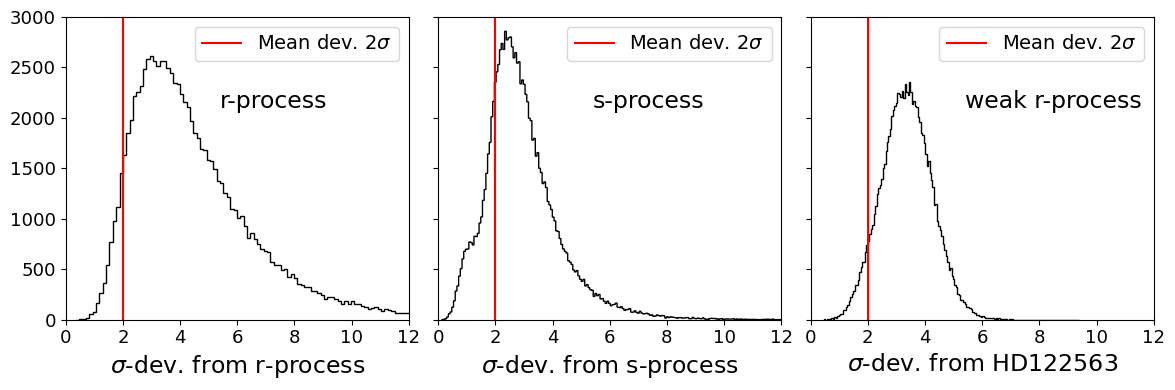

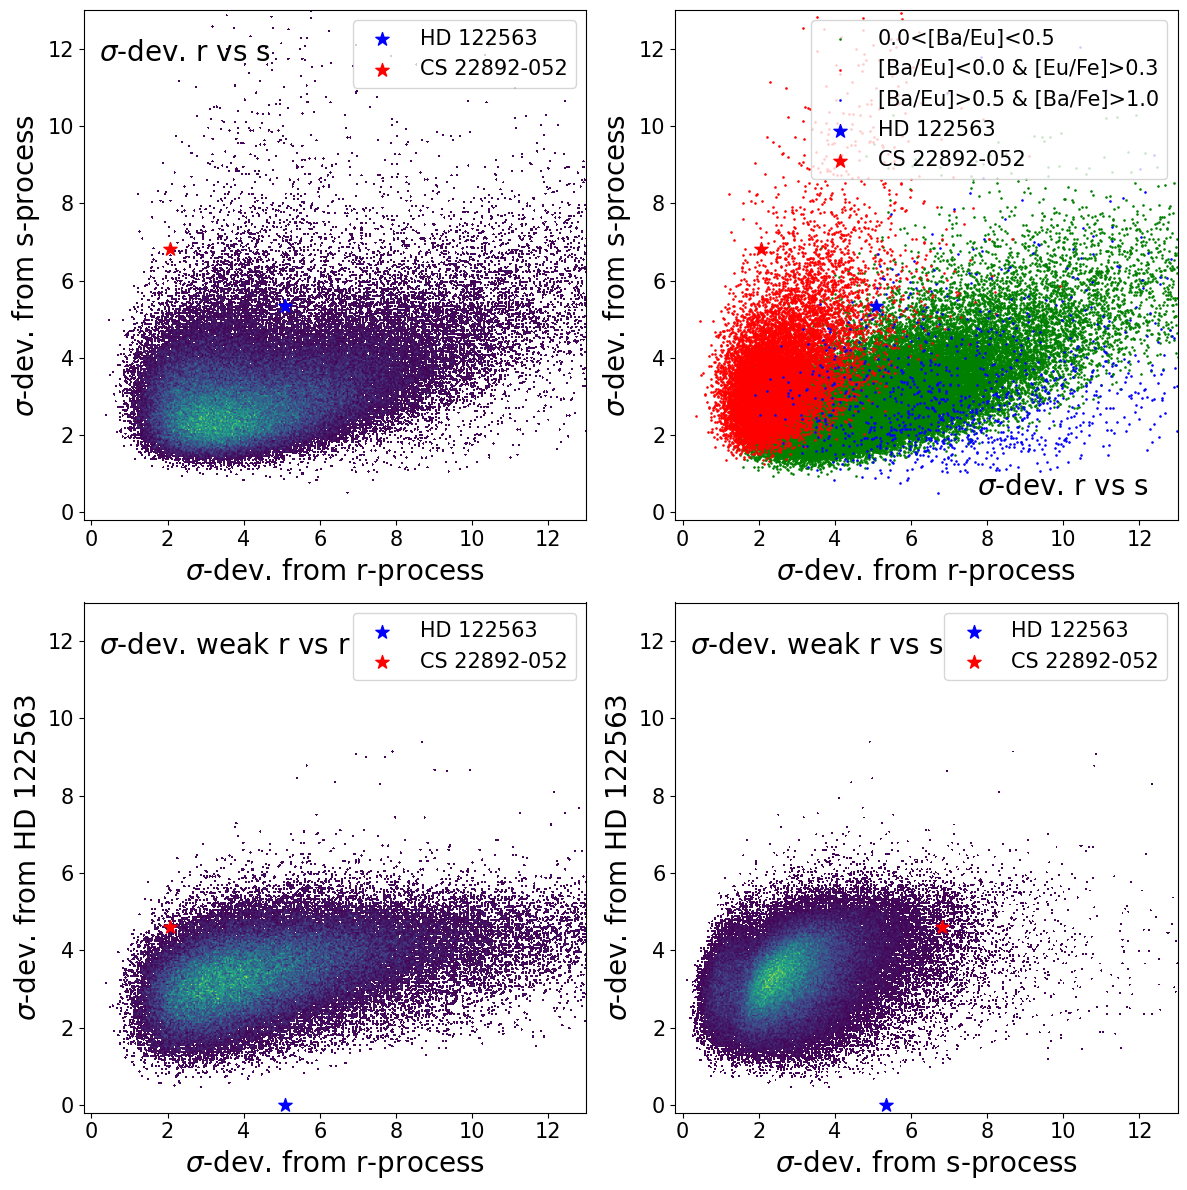

In [6]:
# histogram displaying the sigma deviations from respective patterns
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(12,4),sharey=True)
axs[0].hist(res_sun_r[few_elem & (np.isnan(eufe_galah)==False)],bins='auto',histtype='step', stacked=True, fill=False,color='black')
axs[0].set_xlabel('$\sigma$-dev. from r-process',size=17)
axs[0].axvline(2,label='Mean dev. $2\sigma$',color='red')
axs[0].annotate(r'r-process',size=17, xy=(0.45, 0.7), xycoords='axes fraction')
axs[0].set_xlim(0,12)
axs[0].legend(fontsize=14)
axs[0].tick_params(axis='both',which='major',labelsize=13)
axs[1].hist(res_sun_s[few_elem & (np.isnan(bafe_galah)==False)],bins='auto',histtype='step', stacked=True, fill=False,color='black')
axs[1].set_xlabel('$\sigma$-dev. from s-process',size=17)
axs[1].axvline(2,label='Mean dev. $2\sigma$',color='red')
axs[1].annotate(r's-process',size=17, xy=(0.45, 0.7), xycoords='axes fraction')
axs[1].set_xlim(0,12)
axs[1].legend(fontsize=14)
axs[1].tick_params(axis='both',which='major',labelsize=13)
axs[2].hist(res_hd[few_elem & (np.isnan(zrfe_galah)==False)],bins='auto',histtype='step', stacked=True, fill=False,color='black')
axs[2].set_xlabel('$\sigma$-dev. from HD122563',size=17)
axs[2].axvline(2,label='Mean dev. $2\sigma$',color='red')
axs[2].annotate(r'weak r-process',size=17, xy=(0.45, 0.7), xycoords='axes fraction')
axs[2].set_xlim(0,12)
axs[2].legend(fontsize=14)
axs[2].tick_params(axis='both',which='major',labelsize=13)
plt.tight_layout()
plt.savefig('figures/A_04a_sigdev_hist_patterns.png',format='png')

# 2D plots where I plot the deviation from solar-system s-process component vs. deviation from solar-system r-process component, deviation from HD122563 vs. deviation from solar-system r-process component, and deviation from HD 122563 vs. deviation from solar-system s-process component
fig1=plt.figure(figsize=(12,12))
ax = fig1.add_subplot(2,2,1,projection='scatter_density')
density = ax.scatter_density(res_sun_r[few_elem & (np.isnan(res_sun_r)==False) & (np.isnan(res_sun_s)==False)],res_sun_s[few_elem & (np.isnan(res_sun_r)==False) & (np.isnan(res_sun_s)==False)],cmap=white_viridis)
plt.scatter(sigdev_sunr_hd,sigdev_suns_hd,label='HD 122563',marker='*',color='blue',s=100)
plt.scatter(sigdev_sunr_cs,sigdev_suns_cs,label='CS 22892-052',marker='*',color='red',s=100)
plt.xlabel('$\sigma$-dev. from r-process',size=20)
plt.ylabel('$\sigma$-dev. from s-process',size=20)
plt.annotate(r'$\sigma$-dev. r vs s',size=20, xy=(0.03, 0.9), xycoords='axes fraction')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(-0.2,13)
plt.ylim(-0.2,13)
plt.legend(fontsize=15)
fig1.add_subplot(2,2,2,projection='scatter_density')
plt.scatter(res_sun_r[few_elem & cond_rsproc],res_sun_s[few_elem & cond_rsproc],marker='.',color='green',s=3,label='0.0<[Ba/Eu]<0.5')
plt.scatter(res_sun_r[few_elem & cond_rproc],res_sun_s[few_elem & cond_rproc],marker='.',color='red',s=3,label='[Ba/Eu]<0.0 & [Eu/Fe]>0.3')
plt.scatter(res_sun_r[few_elem & cond_sproc],res_sun_s[few_elem & cond_sproc],marker='.',color='blue',s=3,label='[Ba/Eu]>0.5 & [Ba/Fe]>1.0')
plt.scatter(sigdev_sunr_hd,sigdev_suns_hd,label='HD 122563',marker='*',color='blue',s=100)
plt.scatter(sigdev_sunr_cs,sigdev_suns_cs,label='CS 22892-052',marker='*',color='red',s=100)
plt.xlabel('$\sigma$-dev. from r-process',size=20)
plt.ylabel('$\sigma$-dev. from s-process',size=20)
plt.annotate(r'$\sigma$-dev. r vs s',size=20, xy=(0.6, 0.05), xycoords='axes fraction')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(-0.2,13)
plt.ylim(-0.2,13)
plt.legend(fontsize=15)
ax = fig1.add_subplot(2,2,3,projection='scatter_density')
density = ax.scatter_density(res_sun_r[few_elem & (np.isnan(res_sun_r)==False) & (np.isnan(res_hd)==False)],res_hd[few_elem & (np.isnan(res_sun_r)==False) & (np.isnan(res_hd)==False)],cmap=white_viridis)
plt.scatter(sigdev_sunr_hd,0,label='HD 122563',marker='*',color='blue',s=100)
plt.scatter(sigdev_sunr_cs,sigdev_hd_cs,label='CS 22892-052',marker='*',color='red',s=100)
plt.xlabel('$\sigma$-dev. from r-process',size=20)
plt.ylabel('$\sigma$-dev. from HD 122563',size=20)
plt.annotate(r'$\sigma$-dev. weak r vs r',size=20, xy=(0.03, 0.9), xycoords='axes fraction')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(-0.2,13)
plt.ylim(-0.2,13)
plt.legend(fontsize=15)
ax = fig1.add_subplot(2,2,4,projection='scatter_density')
density = ax.scatter_density(res_sun_s[few_elem & (np.isnan(res_sun_s)==False) & (np.isnan(res_hd)==False)],res_hd[few_elem & (np.isnan(res_sun_s)==False) & (np.isnan(res_hd)==False)],cmap=white_viridis)
plt.scatter(sigdev_suns_hd,0,label='HD 122563',marker='*',color='blue',s=100)
plt.scatter(sigdev_suns_cs,sigdev_hd_cs,label='CS 22892-052',marker='*',color='red',s=100)
plt.xlabel('$\sigma$-dev. from s-process',size=20)
plt.ylabel('$\sigma$-dev. from HD 122563',size=20)
plt.annotate(r'$\sigma$-dev. weak r vs s',size=20, xy=(0.03, 0.9), xycoords='axes fraction')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(-0.2,13)
plt.ylim(-0.2,13)
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('figures/A_04b_2d_plots_sigdev_patterns.png',format='png')

The number of r-process candidates using this selection: 1923
The number of s-process candidates using this selection: 8757
The number of weak-r-process candidates using this selection: 2023


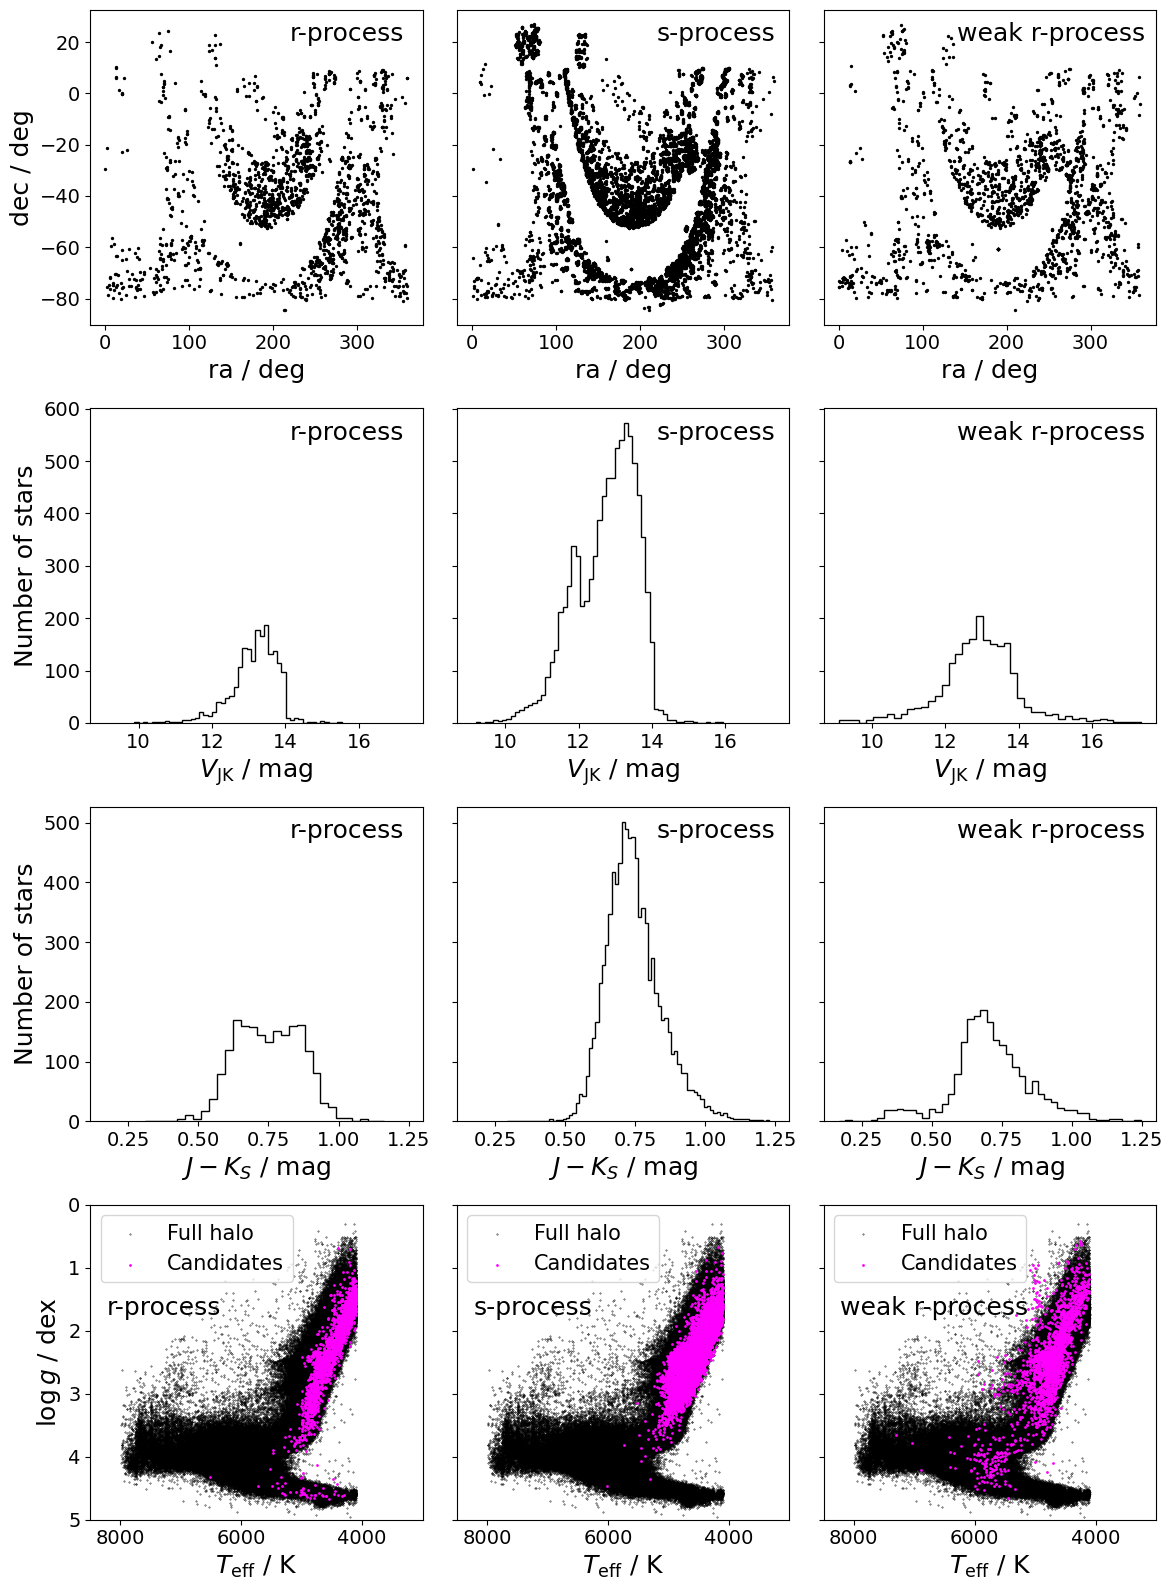

In [7]:
r_cand = (res_sun_r<2.5) & (res_sun_s>3) & (res_hd>3)
s_cand = (res_sun_r>3) & (res_sun_s<2.5) & (res_hd>3)
wr_cand = (res_sun_r>3) & (res_sun_s>3) & (res_hd<2.5)

print('The number of r-process candidates using this selection:',len(table[r_cand]))
print('The number of s-process candidates using this selection:',len(table[s_cand]))
print('The number of weak-r-process candidates using this selection:',len(table[wr_cand]))

# plots on the distribution of the candidates samples
fig,axs = plt.subplots(nrows=4,ncols=3,figsize=(12,16),sharey='row',sharex='row')
axs[0,0].scatter(ra[r_cand],dec[r_cand],s=2,color='black')
axs[0,0].set_xlabel('ra / deg',size=18)
axs[0,0].set_ylabel('dec / deg',size=18)
axs[0,0].annotate(r'r-process',size=18, xy=(0.6, 0.9), xycoords='axes fraction')
axs[0,0].tick_params(axis='both',which='major',labelsize=14)
axs[0,1].scatter(ra[s_cand],dec[s_cand],s=2,color='black')
axs[0,1].set_xlabel('ra / deg',size=18)
axs[0,1].annotate(r's-process',size=18, xy=(0.6, 0.9), xycoords='axes fraction')
axs[0,1].tick_params(axis='both',which='major',labelsize=14)
axs[0,2].scatter(ra[wr_cand],dec[wr_cand],s=2,color='black')
axs[0,2].set_xlabel('ra / deg',size=18)
axs[0,2].annotate(r'weak r-process',size=18, xy=(0.4, 0.9), xycoords='axes fraction')
axs[0,2].tick_params(axis='both',which='major',labelsize=14)
axs[1,0].hist(vmag[r_cand],bins='auto',histtype='step', stacked=True, fill=False,color='black')
axs[1,0].set_xlabel('$V_\mathrm{JK}$ / mag',size=18)
axs[1,0].set_ylabel('Number of stars',size=18)
axs[1,0].annotate(r'r-process',size=18, xy=(0.6, 0.9), xycoords='axes fraction')
axs[1,0].tick_params(axis='both',which='major',labelsize=14)
axs[1,1].hist(vmag[s_cand],bins='auto',histtype='step', stacked=True, fill=False,color='black')
axs[1,1].set_xlabel('$V_\mathrm{JK}$ / mag',size=18)
axs[1,1].annotate(r's-process',size=18, xy=(0.6, 0.9), xycoords='axes fraction')
axs[1,1].tick_params(axis='both',which='major',labelsize=14)
axs[1,2].hist(vmag[wr_cand],bins='auto',histtype='step', stacked=True, fill=False,color='black')
axs[1,2].set_xlabel('$V_\mathrm{JK}$ / mag',size=18)
axs[1,2].annotate(r'weak r-process',size=18, xy=(0.4, 0.9), xycoords='axes fraction')
axs[1,2].tick_params(axis='both',which='major',labelsize=14)
axs[2,0].hist(j_ks[r_cand],bins='auto',histtype='step', stacked=True, fill=False,color='black')
axs[2,0].set_xlabel('$J-K_S$ / mag',size=18)
axs[2,0].set_ylabel('Number of stars',size=18)
axs[2,0].annotate(r'r-process',size=18, xy=(0.6, 0.9), xycoords='axes fraction')
axs[2,0].tick_params(axis='both',which='major',labelsize=14)
axs[2,1].hist(j_ks[s_cand],bins='auto',histtype='step', stacked=True, fill=False,color='black')
axs[2,1].set_xlabel('$J-K_S$ / mag',size=18)
axs[2,1].annotate(r's-process',size=18, xy=(0.6, 0.9), xycoords='axes fraction')
axs[2,1].tick_params(axis='both',which='major',labelsize=14)
axs[2,2].hist(j_ks[wr_cand],bins='auto',histtype='step', stacked=True, fill=False,color='black')
axs[2,2].set_xlabel('$J-K_S$ / mag',size=18)
axs[2,2].annotate(r'weak r-process',size=18, xy=(0.4, 0.9), xycoords='axes fraction')
axs[2,2].tick_params(axis='both',which='major',labelsize=14)
axs[3,0].scatter(teff[(flag_sp==0)],logg[(flag_sp==0)],s=0.1,color='black',label='Full halo')
axs[3,0].scatter(teff[r_cand],logg[r_cand],s=1,color='magenta',label='Candidates')
axs[3,0].set_xlabel('$T_\mathrm{eff}$ / K',size=18)
axs[3,0].set_ylabel('$\log{g}$ / dex',size=18)
axs[3,0].set_ylim(5,0)
axs[3,0].set_xlim(8500,3000)
axs[3,0].annotate(r'r-process',size=18, xy=(0.05, 0.65), xycoords='axes fraction')
axs[3,0].tick_params(axis='both',which='major',labelsize=14)
axs[3,0].legend(fontsize=15,loc=2)
axs[3,1].scatter(teff[(flag_sp==0)],logg[(flag_sp==0)],s=0.1,color='black',label='Full halo')
axs[3,1].scatter(teff[s_cand],logg[s_cand],s=1,color='magenta',label='Candidates')
axs[3,1].set_xlabel('$T_\mathrm{eff}$ / K',size=18)
axs[3,1].set_ylim(5,0)
axs[3,1].set_xlim(8500,3000)
axs[3,1].annotate(r's-process',size=18, xy=(0.05, 0.65), xycoords='axes fraction')
axs[3,1].legend(fontsize=15,loc=2)
axs[3,1].tick_params(axis='both',which='major',labelsize=14)
axs[3,2].scatter(teff[(flag_sp==0)],logg[(flag_sp==0)],s=0.1,color='black',label='Full halo')
axs[3,2].scatter(teff[wr_cand],logg[wr_cand],s=1,color='magenta',label='Candidates')
axs[3,2].set_xlabel('$T_\mathrm{eff}$ / K',size=18)
axs[3,2].set_ylim(5,0)
axs[3,2].set_xlim(8500,3000)
axs[3,2].annotate(r'weak r-process',size=18, xy=(0.05, 0.65), xycoords='axes fraction')
axs[3,2].tick_params(axis='both',which='major',labelsize=14)
axs[3,2].legend(fontsize=15,loc=2)
plt.tight_layout()
plt.savefig('figures/A_05_stat_prop_cand_samples.png',format='png')

In [ ]:
# examples of comparison logeps for a stars selected from each candidate sample
# haven't done this here, only in the 4MOST S2 6D subset
atomic_Z_hd = np.array([38,39,40,41,42,44,46,47,56,57,58,59,60,62,63])

r=0
s=0
wr=0

fig2=plt.figure(figsize=(12,10))
fig2.add_subplot(2,2,1)
plt.errorbar(atomic_Z_galah,np.transpose(logeps_galah)[r],np.transpose(e_logeps_galah)[r],np.transpose(e_logeps_galah)[r],marker='o',linestyle='None',color='red',label='GALAH abundances')
plt.plot(atomic_Z_sun,np.transpose(logeps_sun_r_sc)[r],label='r-process (Solar)',color='black')
plt.xlabel('Atomic number $Z$',size=17)
plt.ylabel('$\log\epsilon$(X)',size=17)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(fontsize=14,loc=3)
plt.annotate(r'r-process',size=17, xy=(0.05, 0.05), xycoords='axes fraction')
plt.annotate(r'$\sigma$='+str(round(res_sun_r[r],2)),size=17, xy=(0.05, 0.15), xycoords='axes fraction')
fig2.add_subplot(2,2,2)
plt.errorbar(atomic_Z_galah,np.transpose(logeps_galah)[s],np.transpose(e_logeps_galah)[s],np.transpose(e_logeps_galah)[s],marker='o',linestyle='None',color='red',label='GALAH abundances')
plt.plot(atomic_Z_sun,np.transpose(logeps_sun_s_sc)[s],label='s-process (Solar)',color='black')
plt.xlabel('Atomic number $Z$',size=17)
plt.ylabel('$\log\epsilon$(X)',size=17)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(fontsize=14,loc=1)
plt.annotate(r's-process',size=17, xy=(0.05, 0.05), xycoords='axes fraction')
plt.annotate(r'$\sigma$='+str(round(res_sun_s[s],2)),size=17, xy=(0.05, 0.15), xycoords='axes fraction')
fig2.add_subplot(2,2,3)
plt.errorbar(atomic_Z_galah,np.transpose(logeps_galah)[wr],np.transpose(e_logeps_galah)[wr],np.transpose(e_logeps_galah)[wr],marker='o',linestyle='None',color='red',label='GALAH abundances')
plt.plot(atomic_Z_hd,np.transpose(logeps_hd_sc)[wr],label='HD 122563 abundances',color='black')
plt.xlabel('Atomic number $Z$',size=17)
plt.ylabel('$\log\epsilon$(X)',size=17)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(fontsize=14,loc=1)
plt.annotate(r'weak r-process',size=17, xy=(0.05, 0.05), xycoords='axes fraction')
plt.annotate(r'$\sigma$='+str(round(res_hd[wr],2)),size=17, xy=(0.05, 0.15), xycoords='axes fraction')
plt.tight_layout()